In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [73]:
df = pd.read_csv('./results/0913/ablation_results.csv')
print(f"Loaded {len(df)} experiments")
print(f"Models: {df['model'].unique()}")
print(f"Seeds: {df['seed'].unique()}")
print(f"WPN values: {sorted(df['wpn'].dropna().unique())}")

df.head()

Loaded 270 experiments
Models: ['Diffusion' 'GRF(wpn=2)' 'GRF-ablation(wpn=2)' 'GRF(wpn=4)'
 'GRF-ablation(wpn=4)' 'GRF(wpn=8)' 'GRF-ablation(wpn=8)' 'GRF(wpn=16)'
 'GRF-ablation(wpn=16)' 'GRF(wpn=32)' 'GRF-ablation(wpn=32)' 'GRF(wpn=64)'
 'GRF-ablation(wpn=64)' 'GRF(wpn=128)' 'GRF-ablation(wpn=128)'
 'GRF(wpn=256)' 'GRF-ablation(wpn=256)' 'GRF(wpn=512)'
 'GRF-ablation(wpn=512)' 'GRF(wpn=1024)' 'GRF-ablation(wpn=1024)'
 'GRF(wpn=2048)' 'GRF-ablation(wpn=2048)' 'GRF(wpn=4096)'
 'GRF-ablation(wpn=4096)' 'GRF(wpn=8192)' 'GRF-ablation(wpn=8192)']
Seeds: [100 101 102 103 104 105 106 107 108 109]
WPN values: [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]


,seed,model,wpn,lml,mse_obs,rmse_obs,nlpd_obs,learned_noise_var,n_train,n_test
0,100,Diffusion,NaN,24.903768,0.091534,0.302545,1.302070,0.008462,90,810
1,100,GRF(wpn=2),2.0,1.402201,0.062360,0.249720,0.117522,0.009300,90,810
2,100,GRF-ablation(wpn=2),2.0,-14.282062,0.062084,0.249166,0.207049,0.009357,90,810
3,100,GRF(wpn=4),4.0,2.136571,0.062375,0.249750,0.150349,0.008370,90,810
4,100,GRF-ablation(wpn=4),4.0,-12.899096,0.060686,0.246345,0.133732,0.009355,90,810


In [74]:
df.model.unique()

array(['Diffusion', 'GRF(wpn=2)', 'GRF-ablation(wpn=2)', 'GRF(wpn=4)',
       'GRF-ablation(wpn=4)', 'GRF(wpn=8)', 'GRF-ablation(wpn=8)',
       'GRF(wpn=16)', 'GRF-ablation(wpn=16)', 'GRF(wpn=32)',
       'GRF-ablation(wpn=32)', 'GRF(wpn=64)', 'GRF-ablation(wpn=64)',
       'GRF(wpn=128)', 'GRF-ablation(wpn=128)', 'GRF(wpn=256)',
       'GRF-ablation(wpn=256)', 'GRF(wpn=512)', 'GRF-ablation(wpn=512)',
       'GRF(wpn=1024)', 'GRF-ablation(wpn=1024)', 'GRF(wpn=2048)',
       'GRF-ablation(wpn=2048)', 'GRF(wpn=4096)',
       'GRF-ablation(wpn=4096)', 'GRF(wpn=8192)',
       'GRF-ablation(wpn=8192)'], dtype=object)

In [75]:
# Harmonize model names and metric columns from updated ablation_study output
# New CSV columns: lml, mse_obs, rmse_obs, nlpd_obs
# Model column now like: 'Diffusion' or 'GRF(wpn=32)' or 'GRF-ablation(wpn=32)'

# Extract base model (capture GRF or GRF-ablation explicitly)
df['base_model'] = df['model'].str.extract(r'^(Diffusion|GRF(?:-ablation)?)')

# Ensure wpn column present (already saved, but keep fallback from model string)
wpn_from_name = df['model'].str.extract(r'wpn=(\d+)')[0].astype(float)
df['wpn'] = df['wpn'].fillna(wpn_from_name)

# Diffusion (no wpn)
diffusion_data = df[df['base_model'] == 'Diffusion'].groupby('seed').agg({
    'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
}).reset_index()

# GRF and GRF-ablation grouped by wpn & seed
grf_data = df[df['base_model'] == 'GRF'].groupby(['wpn', 'seed']).agg({
    'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
}).reset_index()

grf_ablation_data = df[df['base_model'] == 'GRF-ablation'].groupby(['wpn', 'seed']).agg({
    'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
}).reset_index()

# Diffusion summary
diffusion_mean_lml = diffusion_data['lml'].mean()
diffusion_std_lml = diffusion_data['lml'].std()
diffusion_mean_mse = diffusion_data['mse_obs'].mean()
diffusion_std_mse = diffusion_data['mse_obs'].std()
diffusion_mean_rmse = diffusion_data['rmse_obs'].mean()
diffusion_std_rmse = diffusion_data['rmse_obs'].std()
diffusion_mean_nlpd = diffusion_data['nlpd_obs'].mean()
diffusion_std_nlpd = diffusion_data['nlpd_obs'].std()

# Aggregate stats (mean/std over seeds) for plotting
grf_stats = grf_data.groupby('wpn').agg({
    'lml': ['mean', 'std'], 'mse_obs': ['mean', 'std'], 'rmse_obs': ['mean', 'std'], 'nlpd_obs': ['mean', 'std']
}).reset_index()
grf_stats.columns = ['wpn', 'lml_mean', 'lml_std', 'mse_mean', 'mse_std', 'rmse_mean', 'rmse_std', 'nlpd_mean', 'nlpd_std']

grf_ablation_stats = grf_ablation_data.groupby('wpn').agg({
    'lml': ['mean', 'std'], 'mse_obs': ['mean', 'std'], 'rmse_obs': ['mean', 'std'], 'nlpd_obs': ['mean', 'std']
}).reset_index()
grf_ablation_stats.columns = ['wpn', 'lml_mean', 'lml_std', 'mse_mean', 'mse_std', 'rmse_mean', 'rmse_std', 'nlpd_mean', 'nlpd_std']

In [76]:
# # --- Optional seed filtering for plotting ---
# # Set selected_seeds to a list of seeds (e.g., [100,101,102]) to restrict plots.
# # Leave as None or empty list to use all seeds.
# selected_seeds = [100]  # example: [100, 101, 102]

# if selected_seeds:
#     print(f"Filtering to seeds: {selected_seeds}")
#     df_seed = df[df['seed'].isin(selected_seeds)].copy()
#     if df_seed.empty:
#         print("Warning: selected seeds not found; using all seeds instead.")
#         df_seed = df.copy()
# else:
#     df_seed = df.copy()

# # Recompute grouped data with potential seed subset
# _diffusion_seed = df_seed[df_seed['base_model'] == 'Diffusion'].groupby('seed').agg({
#     'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
# }).reset_index()
# _grf_seed = df_seed[df_seed['base_model'] == 'GRF'].groupby(['wpn', 'seed']).agg({
#     'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
# }).reset_index()
# _grf_ab_seed = df_seed[df_seed['base_model'] == 'GRF-ablation'].groupby(['wpn', 'seed']).agg({
#     'lml': 'mean', 'mse_obs': 'mean', 'rmse_obs': 'mean', 'nlpd_obs': 'mean'
# }).reset_index()

# # Update diffusion summaries
# diffusion_mean_lml = _diffusion_seed['lml'].mean()
# diffusion_std_lml  = _diffusion_seed['lml'].std()
# diffusion_mean_mse = _diffusion_seed['mse_obs'].mean()
# diffusion_std_mse  = _diffusion_seed['mse_obs'].std()
# diffusion_mean_rmse = _diffusion_seed['rmse_obs'].mean()
# diffusion_std_rmse  = _diffusion_seed['rmse_obs'].std()
# diffusion_mean_nlpd = _diffusion_seed['nlpd_obs'].mean()
# diffusion_std_nlpd  = _diffusion_seed['nlpd_obs'].std()

# # Recompute aggregated stats for plotting (overwrite prior grf_stats variables)
# grf_stats = _grf_seed.groupby('wpn').agg({
#     'lml': ['mean', 'std'], 'mse_obs': ['mean', 'std'], 'rmse_obs': ['mean', 'std'], 'nlpd_obs': ['mean', 'std']
# }).reset_index()
# grf_stats.columns = ['wpn', 'lml_mean', 'lml_std', 'mse_mean', 'mse_std', 'rmse_mean', 'rmse_std', 'nlpd_mean', 'nlpd_std']

# grf_ablation_stats = _grf_ab_seed.groupby('wpn').agg({
#     'lml': ['mean', 'std'], 'mse_obs': ['mean', 'std'], 'rmse_obs': ['mean', 'std'], 'nlpd_obs': ['mean', 'std']
# }).reset_index()
# grf_ablation_stats.columns = ['wpn', 'lml_mean', 'lml_std', 'mse_mean', 'mse_std', 'rmse_mean', 'rmse_std', 'nlpd_mean', 'nlpd_std']

# print(f"Using {len(_diffusion_seed)} diffusion seed rows, {len(_grf_seed)} GRF rows, {len(_grf_ab_seed)} GRF-ablation rows after seed filter.")

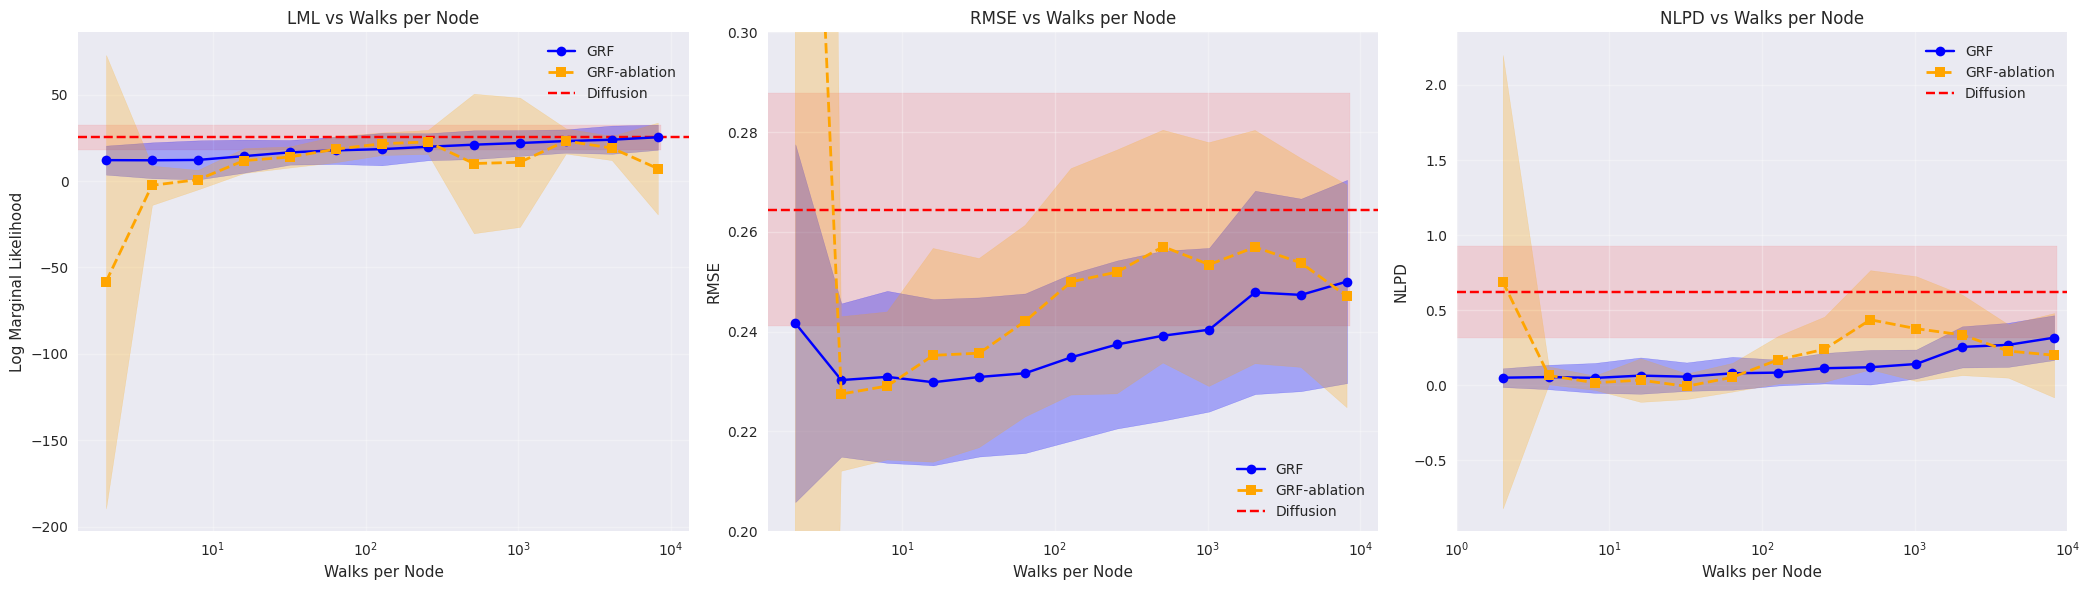

In [86]:
# Ensure sorted by wpn for consistent plotting
grf_stats = grf_stats.sort_values('wpn')
grf_ablation_stats = grf_ablation_stats.sort_values('wpn')

fig, (ax_lml, ax_rmse, ax_nlpd) = plt.subplots(1, 3, figsize=(21, 6))

# -------- LML --------
ax_lml.fill_between(grf_stats['wpn'],
                    grf_stats['lml_mean'] - grf_stats['lml_std'],
                    grf_stats['lml_mean'] + grf_stats['lml_std'],
                    alpha=0.3, color='blue', zorder=1)
ax_lml.plot(grf_stats['wpn'], grf_stats['lml_mean'], 'o-', color='blue', label='GRF', zorder=3)
ax_lml.fill_between(grf_ablation_stats['wpn'],
                    grf_ablation_stats['lml_mean'] - grf_ablation_stats['lml_std'],
                    grf_ablation_stats['lml_mean'] + grf_ablation_stats['lml_std'],
                    alpha=0.25, color='orange', zorder=1)
ax_lml.plot(grf_ablation_stats['wpn'], grf_ablation_stats['lml_mean'], 's--', color='orange', linewidth=2, label='GRF-ablation', zorder=4)
ax_lml.axhline(y=diffusion_mean_lml, color='red', linestyle='--', label='Diffusion', zorder=2)
ax_lml.fill_between(ax_lml.get_xlim(),
                    diffusion_mean_lml - diffusion_std_lml,
                    diffusion_mean_lml + diffusion_std_lml,
                    alpha=0.12, color='red', zorder=0)
ax_lml.set_xscale('log')
ax_lml.set_xlabel('Walks per Node')
ax_lml.set_ylabel('Log Marginal Likelihood')
ax_lml.set_title('LML vs Walks per Node')
ax_lml.grid(True, alpha=0.3)
ax_lml.legend()

# -------- RMSE --------
ax_rmse.fill_between(grf_stats['wpn'],
                     grf_stats['rmse_mean'] - grf_stats['rmse_std'],
                     grf_stats['rmse_mean'] + grf_stats['rmse_std'],
                     alpha=0.3, color='blue', zorder=1)
ax_rmse.plot(grf_stats['wpn'], grf_stats['rmse_mean'], 'o-', color='blue', label='GRF', zorder=3)
ax_rmse.fill_between(grf_ablation_stats['wpn'],
                     grf_ablation_stats['rmse_mean'] - grf_ablation_stats['rmse_std'],
                     grf_ablation_stats['rmse_mean'] + grf_ablation_stats['rmse_std'],
                     alpha=0.25, color='orange', zorder=1)
ax_rmse.plot(grf_ablation_stats['wpn'], grf_ablation_stats['rmse_mean'], 's--', color='orange', linewidth=2, label='GRF-ablation', zorder=4)
ax_rmse.axhline(y=diffusion_mean_rmse, color='red', linestyle='--', label='Diffusion', zorder=2)
ax_rmse.fill_between(ax_rmse.get_xlim(),
                     diffusion_mean_rmse - diffusion_std_rmse,
                     diffusion_mean_rmse + diffusion_std_rmse,
                     alpha=0.12, color='red', zorder=0)
ax_rmse.set_xscale('log')
ax_rmse.set_xlabel('Walks per Node')
ax_rmse.set_ylabel('RMSE')
ax_rmse.set_ylim(0.2,0.3)
ax_rmse.set_title('RMSE vs Walks per Node')
ax_rmse.grid(True, alpha=0.3)
ax_rmse.legend()

# -------- NLPD --------
ax_nlpd.fill_between(grf_stats['wpn'],
                     grf_stats['nlpd_mean'] - grf_stats['nlpd_std'],
                     grf_stats['nlpd_mean'] + grf_stats['nlpd_std'],
                     alpha=0.3, color='blue', zorder=1)
ax_nlpd.plot(grf_stats['wpn'], grf_stats['nlpd_mean'], 'o-', color='blue', label='GRF', zorder=3)
ax_nlpd.fill_between(grf_ablation_stats['wpn'],
                     grf_ablation_stats['nlpd_mean'] - grf_ablation_stats['nlpd_std'],
                     grf_ablation_stats['nlpd_mean'] + grf_ablation_stats['nlpd_std'],
                     alpha=0.25, color='orange', zorder=1)
ax_nlpd.plot(grf_ablation_stats['wpn'], grf_ablation_stats['nlpd_mean'], 's--', color='orange', linewidth=2, label='GRF-ablation', zorder=4)
ax_nlpd.axhline(y=diffusion_mean_nlpd, color='red', linestyle='--', label='Diffusion', zorder=2)
ax_nlpd.fill_between(ax_nlpd.get_xlim(),
                     diffusion_mean_nlpd - diffusion_std_nlpd,
                     diffusion_mean_nlpd + diffusion_std_nlpd,
                     alpha=0.12, color='red', zorder=0)
ax_nlpd.set_xscale('log')
ax_nlpd.set_xlim(1, 10000)
ax_nlpd.set_xlabel('Walks per Node')
ax_nlpd.set_ylabel('NLPD')
ax_nlpd.set_title('NLPD vs Walks per Node')
ax_nlpd.grid(True, alpha=0.3)
ax_nlpd.legend()

plt.tight_layout()
plt.show()

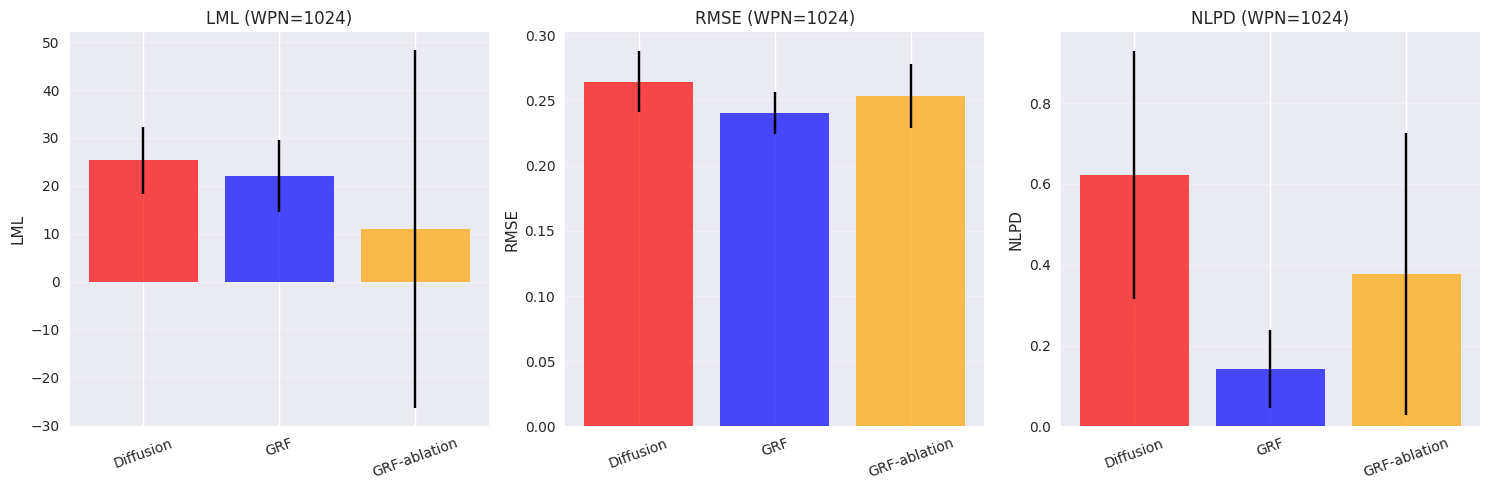

In [78]:
# --- Comparison plot at fixed WPN ---
wpn_target = 1024  # choose the walks-per-node value to compare

# Locate rows for the target wpn
row_grf = grf_stats.loc[grf_stats['wpn'] == wpn_target]
row_ab  = grf_ablation_stats.loc[grf_ablation_stats['wpn'] == wpn_target]

if row_grf.empty or row_ab.empty:
    print(f"WPN={wpn_target} not found in one of the stats tables. Available GRF wpns: {grf_stats['wpn'].tolist()}\n"
          f"Available GRF-ablation wpns: {grf_ablation_stats['wpn'].tolist()}")
else:
    row_grf = row_grf.iloc[0]
    row_ab  = row_ab.iloc[0]

    categories = ['Diffusion', 'GRF', 'GRF-ablation']

    # Prepare metrics (key, title, diffusion_mean_attr, diffusion_std_attr, grf_mean_col, grf_std_col)
    metric_specs = [
        ('LML',  'diffusion_mean_lml',  'diffusion_std_lml',  'lml_mean',  'lml_std'),
        ('RMSE', 'diffusion_mean_rmse', 'diffusion_std_rmse', 'rmse_mean', 'rmse_std'),
        ('NLPD', 'diffusion_mean_nlpd', 'diffusion_std_nlpd', 'nlpd_mean', 'nlpd_std'),
    ]

    fig, axes = plt.subplots(1, len(metric_specs), figsize=(5 * len(metric_specs), 5), sharex=True)
    if len(metric_specs) == 1:
        axes = [axes]

    for ax, (label, diff_mean_attr, diff_std_attr, grf_mean_col, grf_std_col) in zip(axes, metric_specs):
        means = [globals()[diff_mean_attr], row_grf[grf_mean_col], row_ab[grf_mean_col]]
        stds  = [globals()[diff_std_attr],  row_grf[grf_std_col],  row_ab[grf_std_col]]

        x = np.arange(len(categories))
        ax.bar(x, means, yerr=stds, capsize=6, color=['red', 'blue', 'orange'], alpha=0.7)
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=20)
        ax.set_title(f"{label} (WPN={wpn_target})")
        ax.set_ylabel(label)
        ax.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()